In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/adult3.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
import numpy as np

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Drop rows with missing values (can also impute if needed)
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'income' column: <=50K -> 0, >50K -> 1
le_income = LabelEncoder()
df['income'] = le_income.fit_transform(df['income'])

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

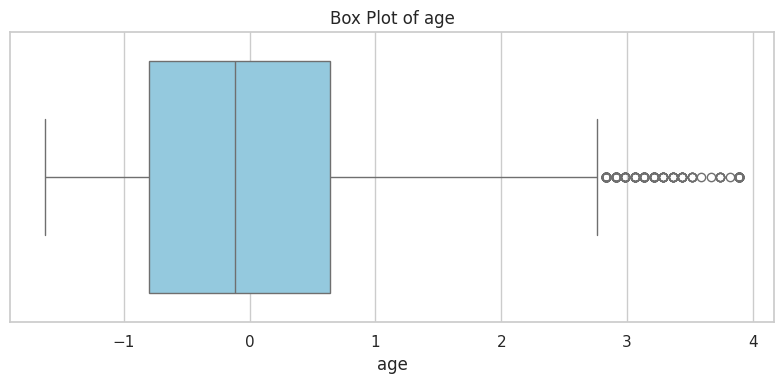

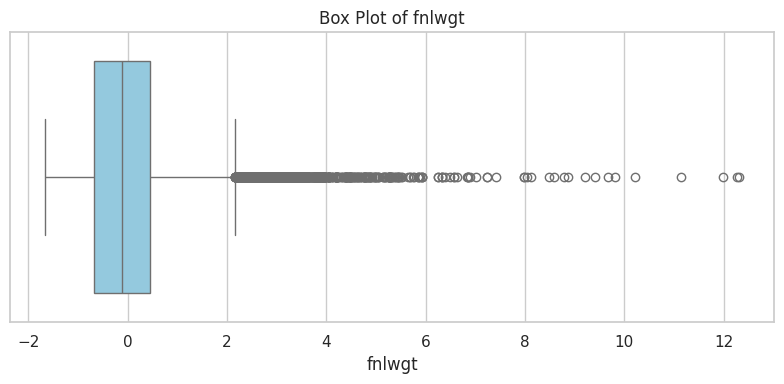

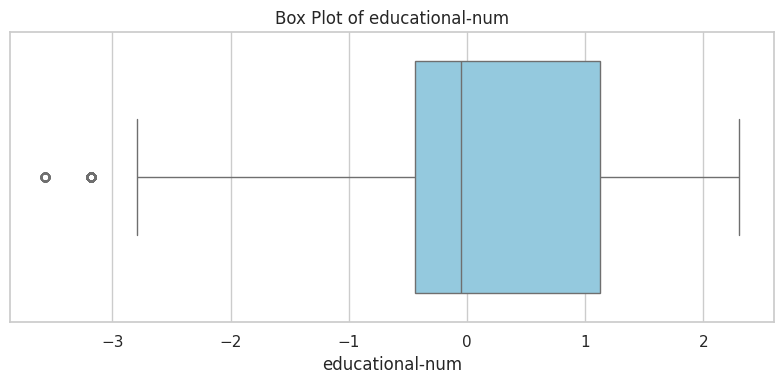

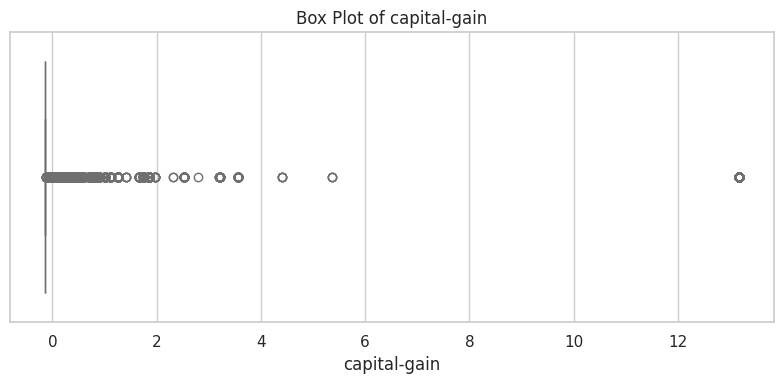

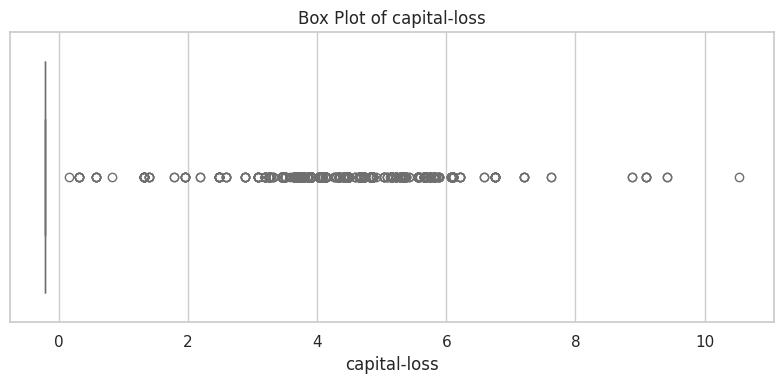

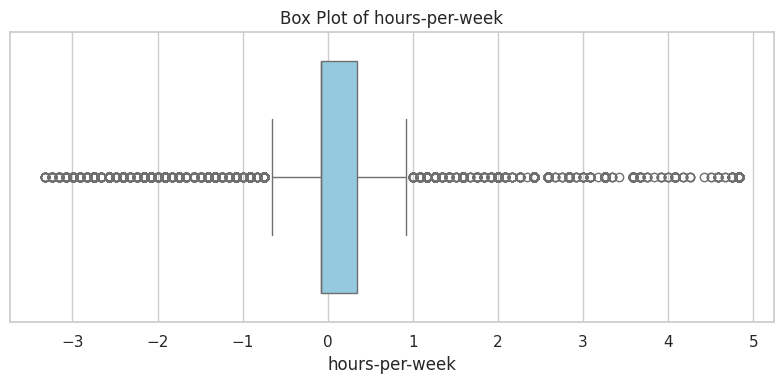

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# Loop through each numeric column and plot a boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
# List of numeric columns
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a copy to avoid modifying the original data
df_clean = df.copy()

# Remove outliers based on IQR for each numeric column
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Final shape after removing outliers
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_clean.shape)

Original shape: (45222, 97)
Shape after removing outliers: (27717, 97)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Ensure you have `x` and `y` defined from the cleaned dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    results[name] = {'accuracy': accuracy, 'report': report}

# Display results
for name, result in results.items():
    print(f"🔍 Model: {name}")
    print(f"✅ Accuracy: {result['accuracy']:.4f}")
    print("📊 Classification Report:\n", result['report'])
    print("-" * 50)

🔍 Model: Logistic Regression
✅ Accuracy: 0.8511
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.74      0.60      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.84      0.85      0.85      9045

--------------------------------------------------
🔍 Model: Random Forest
✅ Accuracy: 0.8514
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.73      0.62      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045

--------------------------------------------------
🔍 Model: K-Nearest Neighbors
✅ Accuracy: 0.8220
📊 Classification Report:
               precision    r

Let's tune the `GradientBoostingClassifier` using `GridSearchCV`. We'll define a parameter grid to search over.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipe_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 4, 5]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation accuracy:", grid_search_gb.best_score_)

# Evaluate the best model on the test set
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
test_report_gb = classification_report(y_test, y_pred_gb, zero_division=0)

print("\n🔍 Model: Tuned Gradient Boosting")
print(f"✅ Test Accuracy: {test_accuracy_gb:.4f}")
print("📊 Classification Report:\n", test_report_gb)

Best parameters for Gradient Boosting: {'gb__learning_rate': 0.2, 'gb__max_depth': 3, 'gb__n_estimators': 200}
Best cross-validation accuracy: 0.8695026136307634

🔍 Model: Tuned Gradient Boosting
✅ Test Accuracy: 0.8748
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6842
           1       0.80      0.64      0.71      2203

    accuracy                           0.87      9045
   macro avg       0.85      0.80      0.82      9045
weighted avg       0.87      0.87      0.87      9045



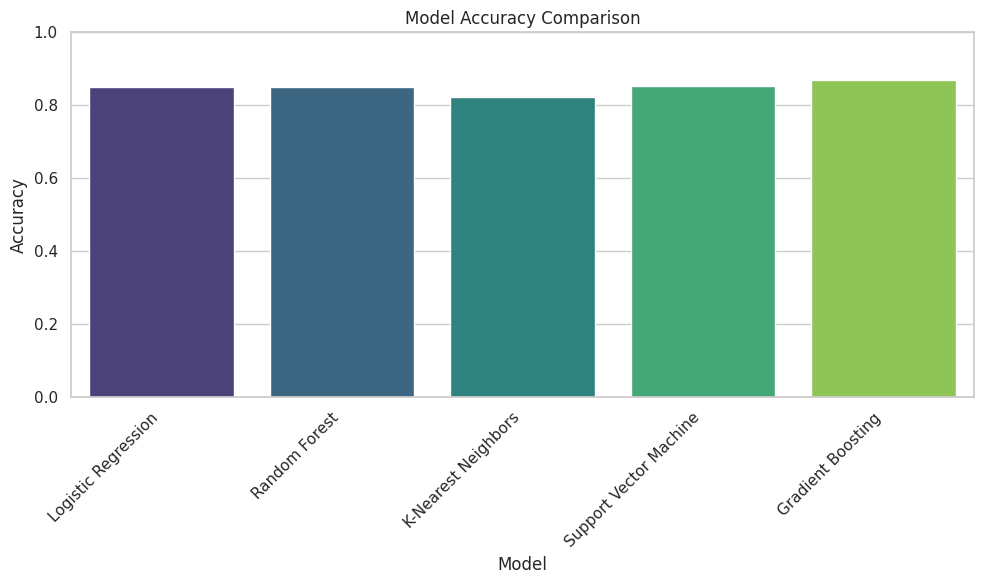

In [ ]:
# Create a bar chart of the accuracies
model_names = list(results.keys())
accuracies = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis', hue=model_names, legend=False)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import joblib
import os

# Create a directory to save the models if it doesn't exist
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save each trained model using joblib
for name, model in models.items():
    filename = os.path.join(model_dir, f"{name.replace(' ', '_').lower()}_model.pkl")
    joblib.dump(model, filename)
    print(f"Saved {name} model to {filename}")

# Save the best tuned Gradient Boosting model separately
tuned_gb_filename = os.path.join(model_dir, "tuned_gradient_boosting_model.pkl")
joblib.dump(best_gb_model, tuned_gb_filename)
print(f"Saved Tuned Gradient Boosting model to {tuned_gb_filename}")

Saved Logistic Regression model to saved_models/logistic_regression_model.pkl
Saved Random Forest model to saved_models/random_forest_model.pkl
Saved K-Nearest Neighbors model to saved_models/k-nearest_neighbors_model.pkl
Saved Support Vector Machine model to saved_models/support_vector_machine_model.pkl
Saved Gradient Boosting model to saved_models/gradient_boosting_model.pkl
Saved Tuned Gradient Boosting model to saved_models/tuned_gradient_boosting_model.pkl
